<a href="https://colab.research.google.com/github/VinhTruong1120/colorectal-histology.ipynb/blob/main/colorectal_histology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
import random
from tensorflow.keras import layers

In [123]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [124]:
x_test_original = x_test
x_test_original.shape

(10000, 28, 28)

In [125]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [126]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [127]:
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [128]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [129]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
class_nums = len(class_names)
print(class_nums)

10


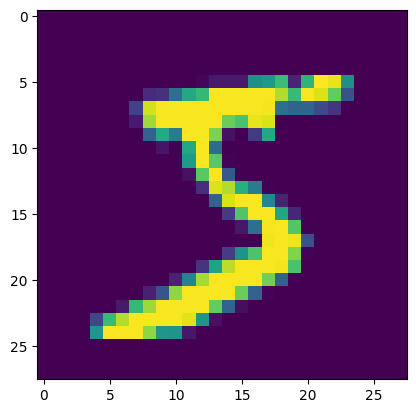

In [130]:
plt.imshow(x_train[0])

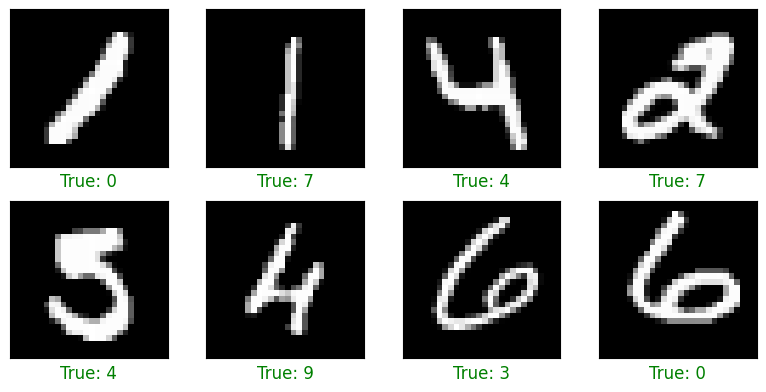

In [154]:
from typing import Optional
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray] = None) -> None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))
  len_x = x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx//ncols, idx%ncols]
    img_idx = random.randint(0, len_x)
    ax.imshow(x_data[img_idx], cmap='gray')
    ax.set(xticks=[], yticks=[])
    color = 'green'
    true_label_str = f"True: {class_names[y_data[img_idx]]}"
    if y_proba is not None:
      predict_idx = np.argmax(y_proba[img_idx])
      predict_label = {class_names[predict_idx]}
      color = 'red' if predict_idx != y_data[img_idx] else color
      predict_label_str = f"\nPredicted: {predict_label}"

    img_title = true_label_str if y_proba is None else true_label_str + predict_label_str
    ax.set_xlabel(img_title, color=color, fontsize=12)
  plt.tight_layout()
  plt.show
plot_data(x_test, y_train)

In [132]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

In [133]:
x_test.shape, x_test.dtype

((10000, 28, 28), dtype('float32'))

In [134]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [135]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [136]:
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [137]:
y_train[0], y_train_label[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [138]:
input_shape = (28, 28, 1)

In [139]:
from keras.api._v2.keras import activations
model = keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [141]:
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train_label, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 5s 11ms/step - loss: 0.2608 - accuracy: 0.9213 - val_loss: 0.1082 - val_accuracy: 0.9682
Epoch 2/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0967 - accuracy: 0.9701 - val_loss: 0.0776 - val_accuracy: 0.9767
Epoch 3/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0606 - accuracy: 0.9807 - val_loss: 0.0701 - val_accuracy: 0.9790
Epoch 4/10
422/422 [==============================] - 4s 11ms/step - loss: 0.0422 - accuracy: 0.9863 - val_loss: 0.0754 - val_accuracy: 0.9770
Epoch 5/10
422/422 [==============================] - 5s 12ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0635 - val_accuracy: 0.9848
Epoch 6/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0758 - val_accuracy: 0.9815
Epoch 7/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0802 - val_accuracy: 0.9803

In [142]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [143]:
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

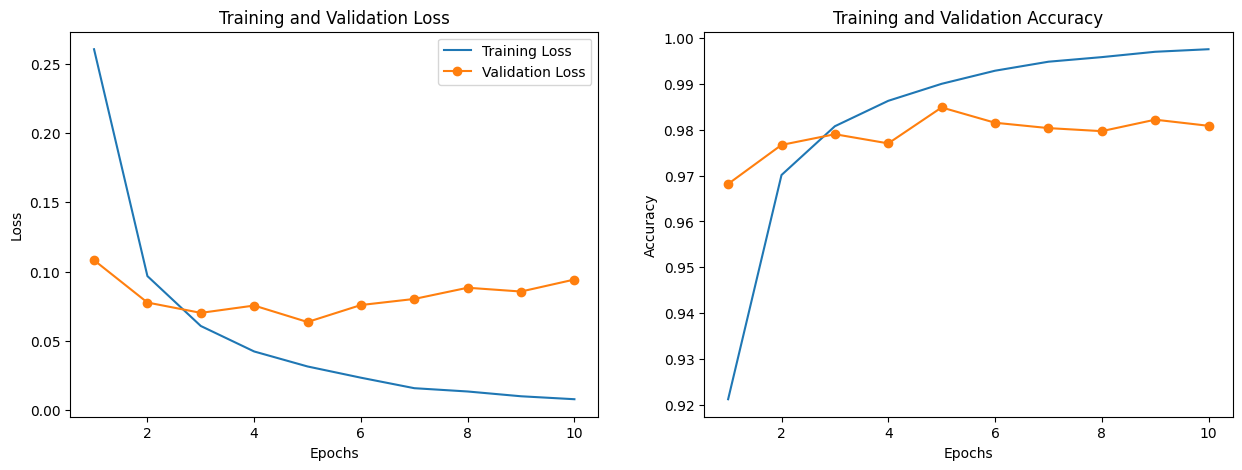

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label='Training Loss')
ax1.plot(epoch_runs, val_loss, label='Validation Loss', marker ='o')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label='Training Accuracy')
ax2.plot(epoch_runs, val_acc, label='Validation Accuracy', marker ='o')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend

plt.show()

In [145]:
score = model.evaluate(x_test, y_test_label)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.9801
Test loss: 0.0906
Test accuracy: 0.9801


In [146]:
x_sample = x_test[:3]
y_proba = model.predict(x_sample)
y_proba.round()

1/1 [==============================] - 0s 61ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [147]:
prediction = np.argmax(y_proba, axis=1)
[class_names[pred] for pred in prediction]

['7', '2', '1']

In [148]:
y_proba = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [149]:
y_proba.shape

(10000, 10)

In [150]:
y_test.shape, x_test_original.shape

((10000,), (10000, 28, 28))

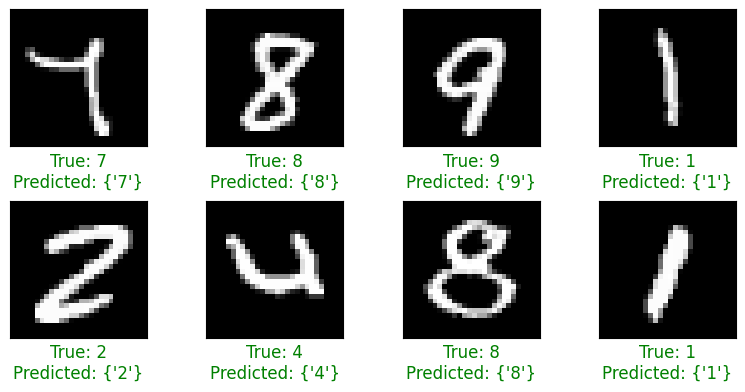

In [157]:
plot_data(x_test_original, y_test, y_proba)